In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data1 = pd.read_csv("AAPL.csv")
data2=pd.read_csv("EVDS (1).csv")
data1["Date"] = pd.to_datetime(data1["Date"], format="%d.%m.%Y")
close_prices = data1.set_index("Date")["Close"]

In [7]:
from TimeSeriesTools import TimeSeriesTools
from HistoricalSimulation import HistoricalSimulation

In [8]:
ts = TimeSeriesTools()
hs = HistoricalSimulation()

In [10]:
portfolio_simple = hs.simulate(close_prices, initial_value=10000, method='simple', start="2023-06-01")
portfolio_log = hs.simulate(close_prices, initial_value=10000, method='log', start="2023-06-01")
print(portfolio_simple)
print(portfolio_log)

2024-10-02    10000.000000
2024-10-03     9951.053865
2024-10-04    10000.882149
2024-10-07     9775.554041
2024-10-08     9955.463941
                  ...     
2025-09-25    11379.551901
2025-09-26    11317.088257
2025-09-29    11271.457790
2025-09-30    11280.318495
2025-10-01    11316.644814
Name: Portfolio Value (Simple), Length: 250, dtype: float64
2024-10-02    10000.000000
2024-10-03     9951.053865
2024-10-04    10000.882149
2024-10-07     9775.554041
2024-10-08     9955.463941
                  ...     
2025-09-25    11379.551901
2025-09-26    11317.088257
2025-09-29    11271.457790
2025-09-30    11280.318495
2025-10-01    11316.644814
Name: Portfolio Value (Log), Length: 250, dtype: float64


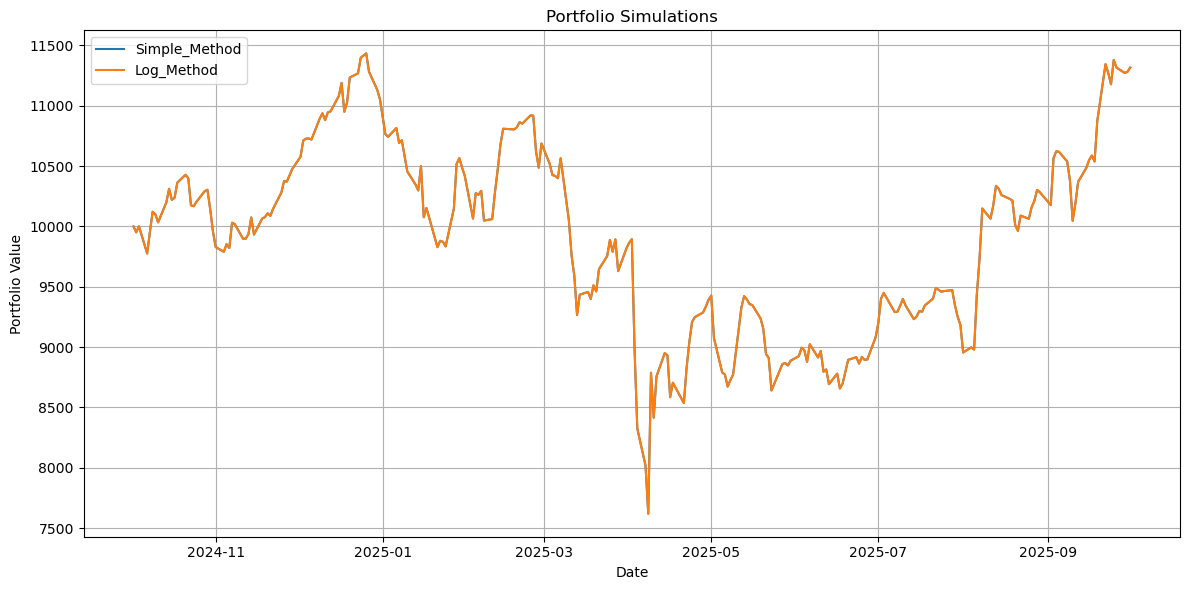

In [11]:
hs.plot_portfolios(Simple_Method=portfolio_simple, Log_Method=portfolio_log)

In [13]:
vol_ewma_last = hs.calculate_volatility(close_prices, method='ewma', return_series=False)
vol_ewma_series = hs.calculate_volatility(close_prices, method='ewma', return_series=True)
print("EWMA Volatility Series (last 3):"); print(vol_ewma_series)
print(f"Last EWMA Volatility (lambda=0.94): {vol_ewma_last:.6f}")

EWMA Volatility Series (last 3):
Date
2024-10-03    0.004895
2024-10-04    0.004953
2024-10-07    0.013987
2024-10-08    0.015323
2024-10-09    0.015643
                ...   
2025-09-25    0.018309
2025-09-26    0.017802
2025-09-29    0.017288
2025-09-30    0.016763
2025-10-01    0.016271
Name: EWMA Volatility (λ=0.94), Length: 249, dtype: float64
Last EWMA Volatility (lambda=0.94): 0.016271


In [14]:
vol_simple_roll_last = hs.calculate_volatility(close_prices, method='simple', window=21, return_series=False)
vol_simple_roll_series = hs.calculate_volatility(close_prices, method='simple', window=21, return_series=True)
print(f"\nLast Simple Rolling Volatility (window=21): {vol_simple_roll_last:.6f}")
print("Simple Rolling Volatility Series (last 3):"); print(vol_simple_roll_series.tail(10))


Last Simple Rolling Volatility (window=21): 0.017771
Simple Rolling Volatility Series (last 3):
Date
2025-09-18    0.014743
2025-09-19    0.015315
2025-09-22    0.017356
2025-09-23    0.017508
2025-09-24    0.017682
2025-09-25    0.017886
2025-09-26    0.018048
2025-09-29    0.018130
2025-09-30    0.018094
2025-10-01    0.017771
Name: Rolling Volatility (window=21), dtype: float64


In [15]:
vol_simple_exp_last = hs.calculate_volatility(close_prices, method='simple', window=None, return_series=False)
vol_simple_exp_series = hs.calculate_volatility(close_prices, method='simple', window=None, return_series=True)
print(f"\nLast Simple Expanding Volatility: {vol_simple_exp_last:.6f}")
print("Simple Expanding Volatility Series (last 3):"); print(vol_simple_exp_series)


Last Simple Expanding Volatility: 0.020465
Simple Expanding Volatility Series (last 3):
Date
2024-10-03         NaN
2024-10-04    0.007002
2024-10-07    0.013949
2024-10-08    0.017237
2024-10-09    0.016897
                ...   
2025-09-25    0.020625
2025-09-26    0.020587
2025-09-29    0.020548
2025-09-30    0.020506
2025-10-01    0.020465
Name: Expanding Volatility, Length: 249, dtype: float64


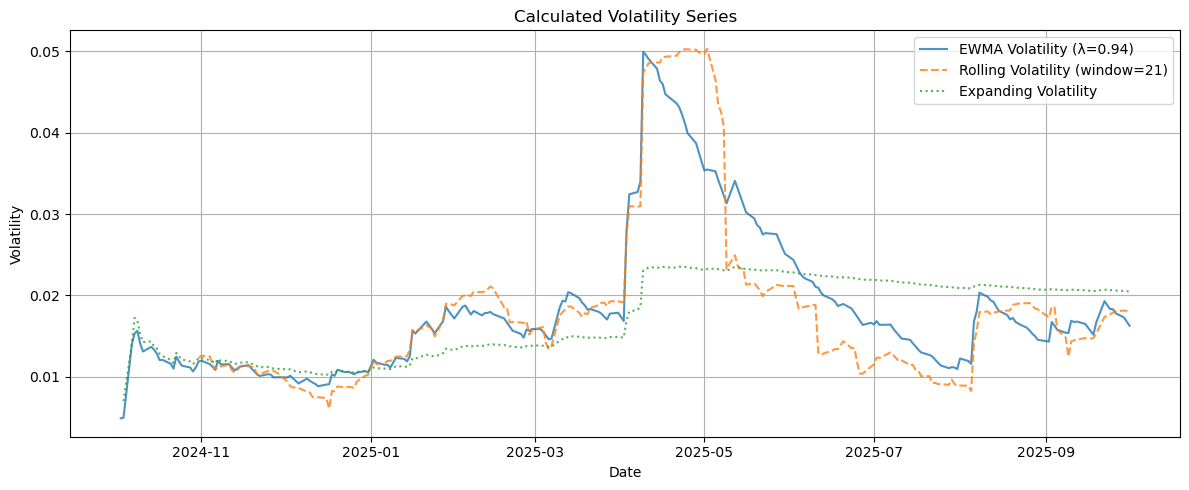

In [16]:
plt.figure(figsize=(12, 5))
if not vol_ewma_series.empty: plt.plot(vol_ewma_series, label=vol_ewma_series.name, alpha=0.8)
if not vol_simple_roll_series.empty: plt.plot(vol_simple_roll_series, label=vol_simple_roll_series.name, linestyle='--', alpha=0.8)
if not vol_simple_exp_series.empty: plt.plot(vol_simple_exp_series, label=vol_simple_exp_series.name, linestyle=':', alpha=0.8)
plt.title("Calculated Volatility Series")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
current_val = 1_000_000
lookback_period_start = close_prices.index[len(close_prices) - 252] 

var_99_s = hs.calculate_var(close_prices, start=lookback_period_start, confidence_level=0.99, current_value=current_val, return_method='simple')
var_95_s = hs.calculate_var(close_prices, start=lookback_period_start, confidence_level=0.95, current_value=current_val, return_method='simple')
var_99_l = hs.calculate_var(close_prices, start=lookback_period_start, confidence_level=0.99, current_value=current_val, return_method='log')
var_95_l = hs.calculate_var(close_prices, start=lookback_period_start, confidence_level=0.95, current_value=current_val, return_method='log')

print(f"Current Value for VaR/ES: ${current_val:,.0f}")
print(f"VaR 99% (Simple Returns): ${var_99_s:,.2f}")
print(f"VaR 95% (Simple Returns): ${var_95_s:,.2f}")
print(f"VaR 99% (Log Returns):    ${var_99_l:,.2f}")
print(f"VaR 95% (Log Returns):    ${var_95_l:,.2f}")

Current Value for VaR/ES: $1,000,000
VaR 99% (Simple Returns): $3,220.33
VaR 95% (Simple Returns): $3,220.33
VaR 99% (Log Returns):    $3,215.15
VaR 95% (Log Returns):    $3,215.15


In [18]:
es_99_s = hs.calculate_es(close_prices, start=lookback_period_start, confidence_level=0.99, current_value=current_val, return_method='simple')
es_95_s = hs.calculate_es(close_prices, start=lookback_period_start, confidence_level=0.95, current_value=current_val, return_method='simple')
es_99_l = hs.calculate_es(close_prices, start=lookback_period_start, confidence_level=0.99, current_value=current_val, return_method='log')
es_95_l = hs.calculate_es(close_prices, start=lookback_period_start, confidence_level=0.95, current_value=current_val, return_method='log')

print(f"ES 99% (Simple Returns): ${es_99_s:,.2f}")
print(f"ES 95% (Simple Returns): ${es_95_s:,.2f}")
print(f"ES 99% (Log Returns):    ${es_99_l:,.2f}")
print(f"ES 95% (Log Returns):    ${es_95_l:,.2f}")

ES 99% (Simple Returns): $3,220.33
ES 95% (Simple Returns): $3,220.33
ES 99% (Log Returns):    $3,215.15
ES 95% (Log Returns):    $3,215.15


The most suitable difference degree d = 1
 Best model: ARIMA(1, 1, 3)
 AIC: 1426.8502
 Cross-Validation RMSE: 8.9682
 Model Sumamary:

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -708.425
Date:                Thu, 23 Oct 2025   AIC                           1426.850
Time:                        11:37:13   BIC                           1444.437
Sample:                             0   HQIC                          1433.929
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7423      0.188      3.942      0.000       0.373       1.

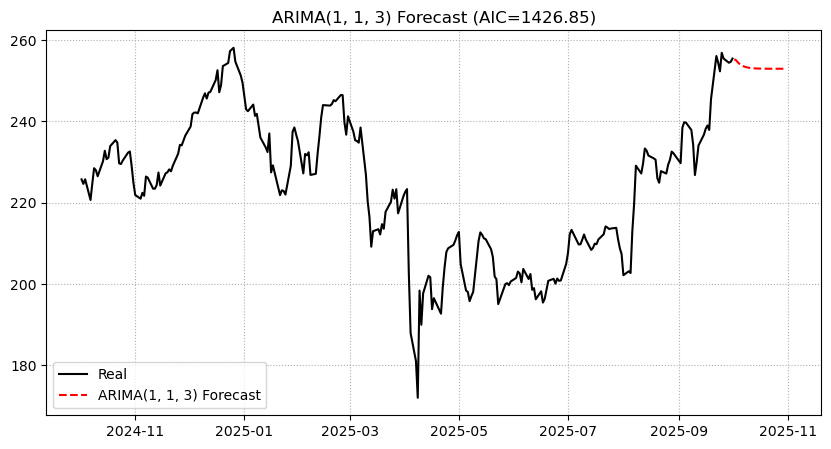

 Model Information:


,Order,Criterion,Best Score,CV RMSE
0,"(1, 1, 3)",AIC,1426.850205,8.968239


In [7]:
forecast, best_model, info= ts.auto_arima(close_prices)

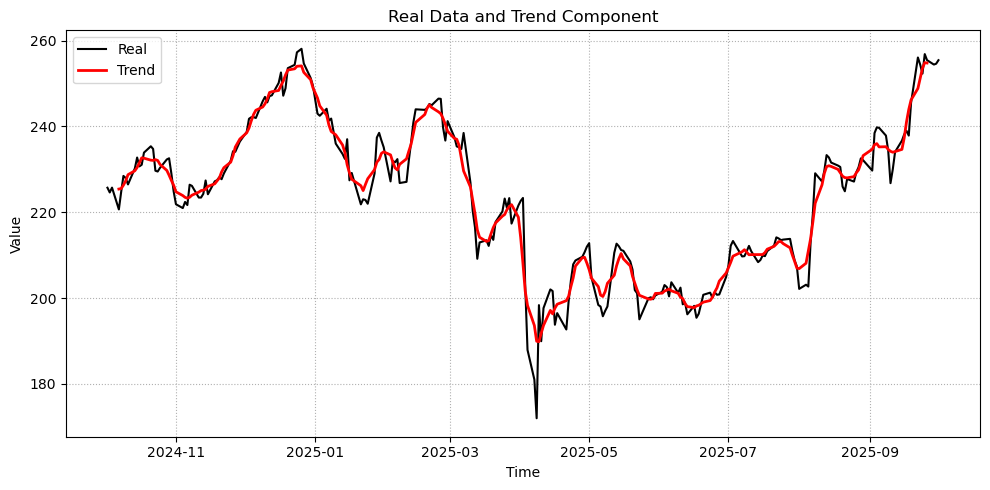

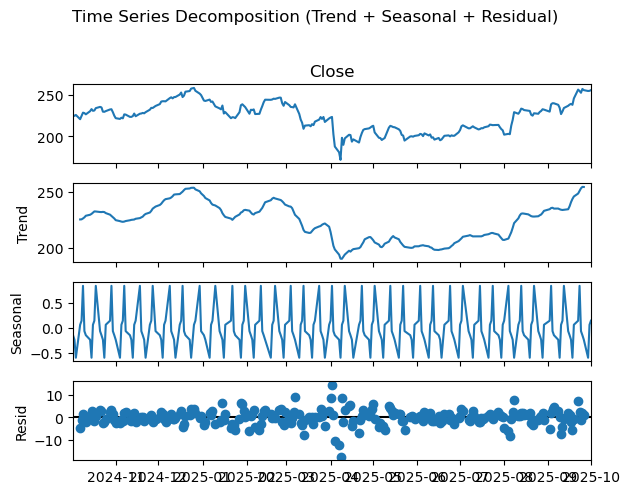

In [9]:
ts.plot_trend_decomposition(close_prices, model="additive", period=7)

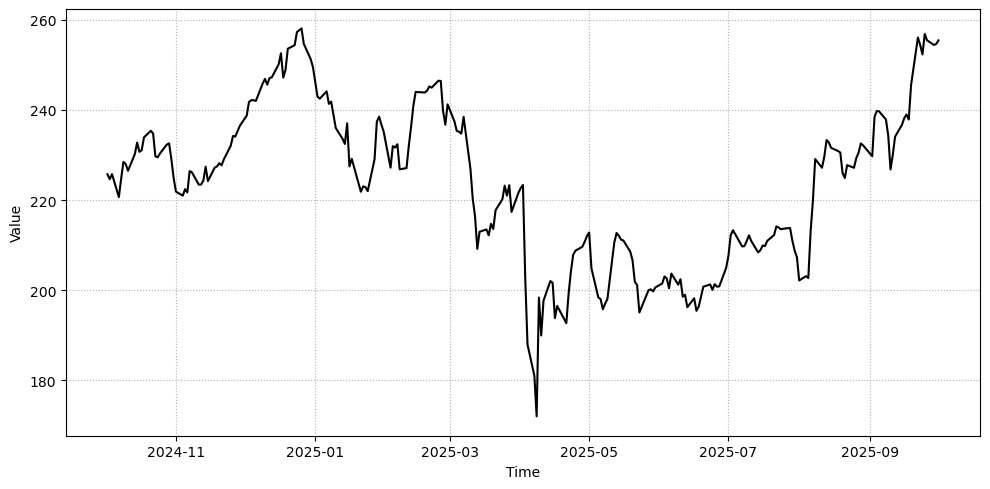

ADF p-value: 0.5408
KPSS p-value: 0.0236
The series is not stationary. It may be necessary to take the difference or extract the trend..


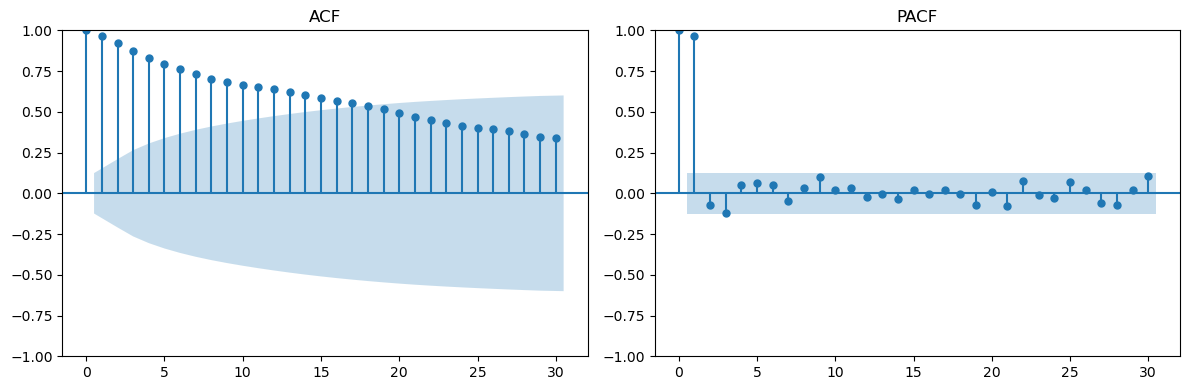

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -713.152
Date:                Thu, 23 Oct 2025   AIC                           1432.304
Time:                        11:39:09   BIC                           1442.856
Sample:                             0   HQIC                          1436.551
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3693      0.404      0.915      0.360      -0.422       1.161
ma.L1         -0.2856      0.414     -0.690      0.490      -1.096       0.525
sigma2        17.9969      0.897     20.056      0.0

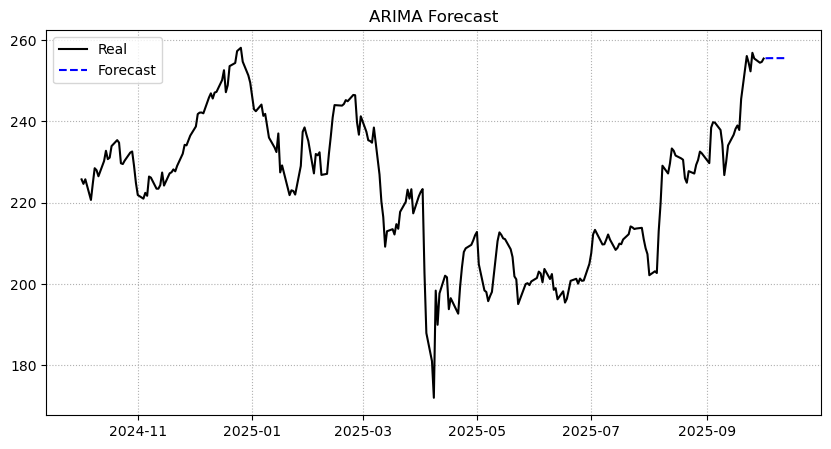

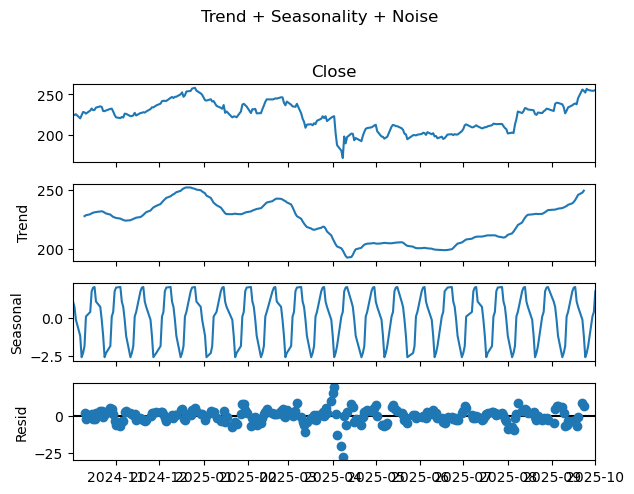

In [12]:
ts.plot_time_series(close_prices)

ts.test_stationarity(close_prices)

ts.plot_acf_pacf(close_prices)

model = ts.fit_arima_model(close_prices, order=(1,1,1))

forecast = ts.forecast_arima(close_prices, model, steps=12)

decomp = ts.manual_decompose(close_prices, period=12)

Kruskal–Wallis H-statistics: 0.0639
p-değeri: 1.0000
No significant seasonality was observed..
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -713.152
Date:                Thu, 23 Oct 2025   AIC                           1432.304
Time:                        11:39:59   BIC                           1442.856
Sample:                             0   HQIC                          1436.551
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3693      0.404      0.915      0.360      -0.422       1.161
ma.L1         -0.2856      0.414    

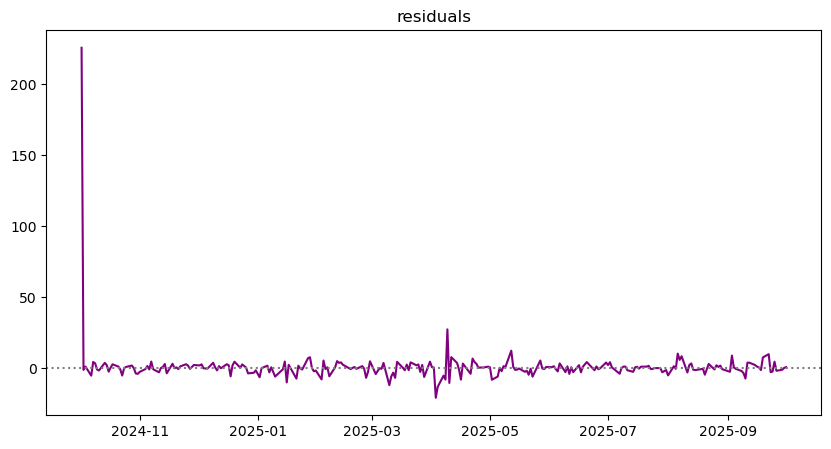

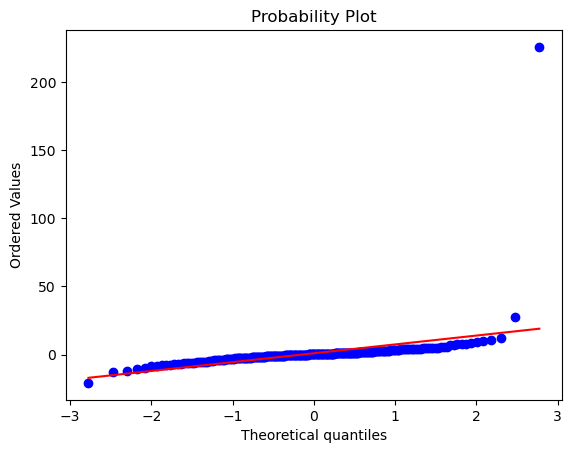

In [13]:
import matplotlib.pyplot as plt
import scipy.stats as stats
ts.test_seasonality(close_prices, period=7)
model = ts.fit_arima_model(close_prices, order=(1,1,1))
residuals = ts.get_residuals(model)
forecaster.test_normality(residuals)
plt.figure(figsize=(10,5))
plt.plot(residuals, color="purple")
plt.axhline(0, color="gray", linestyle=":")
plt.title("residuals")
plt.show()
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

[Backtest - expanding] avarage RMSE: 10.9390


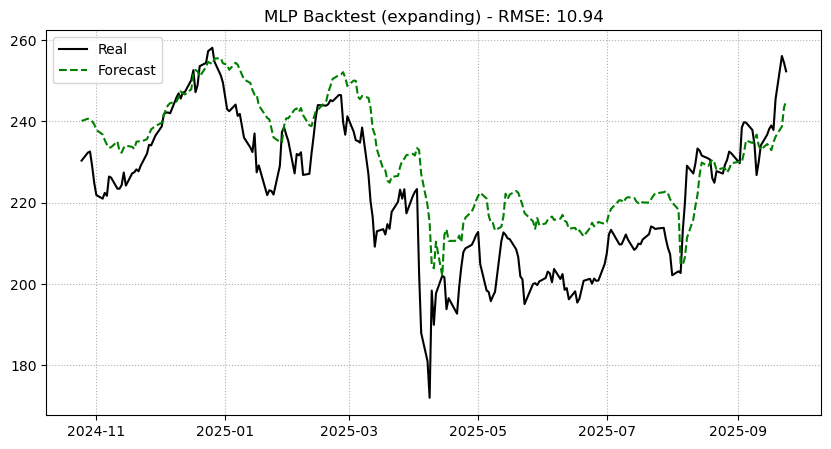

💾 Saved C:\Users\40738043122\forecast_nn_results.xlsx


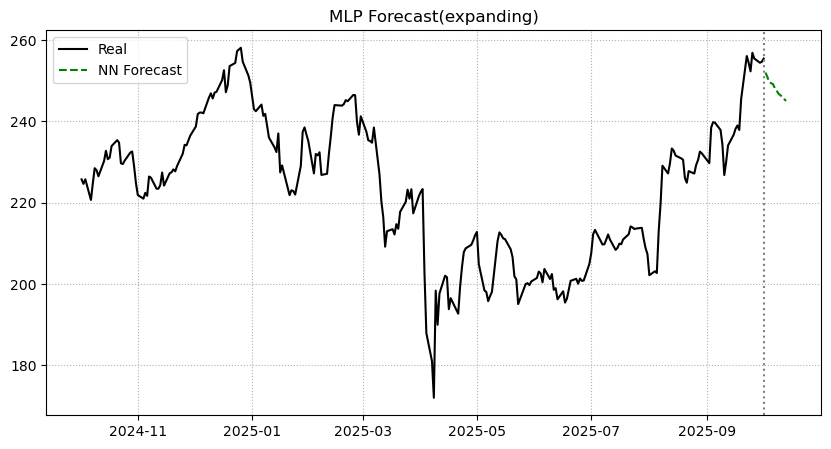

(         Date    Forecast
 0  2025-10-02  252.001997
 1  2025-10-03  250.927591
 2  2025-10-04  249.630357
 3  2025-10-05  249.395845
 4  2025-10-06  249.161120
 5  2025-10-07  248.145003
 6  2025-10-08  247.503729
 7  2025-10-09  246.785115
 8  2025-10-10  246.405528
 9  2025-10-11  245.986509
 10 2025-10-12  245.474628
 11 2025-10-13  245.016637,
 'C:\\Users\\40738043122\\forecast_nn_results.xlsx')

In [15]:
ts.forecast_nn(close_prices, backtest=True, method="expanding")



[Backtest - rolling] avarage RMSE: 6.3651


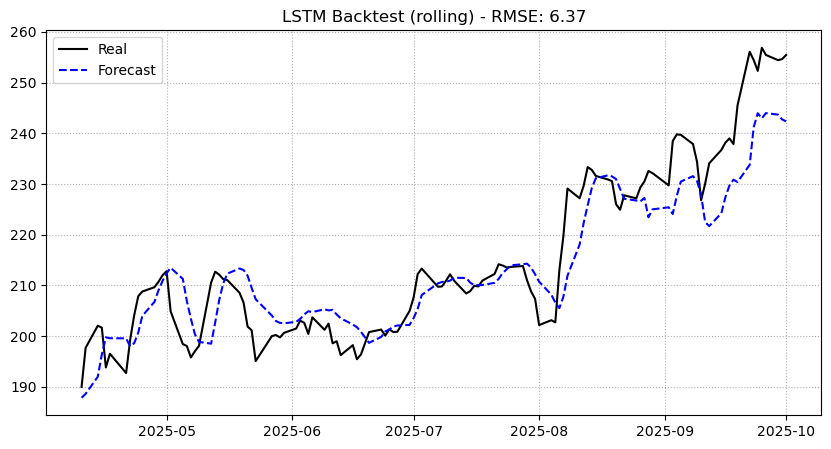

💾 Saved C:\Users\40738043122\forecast_lstm_results.xlsx


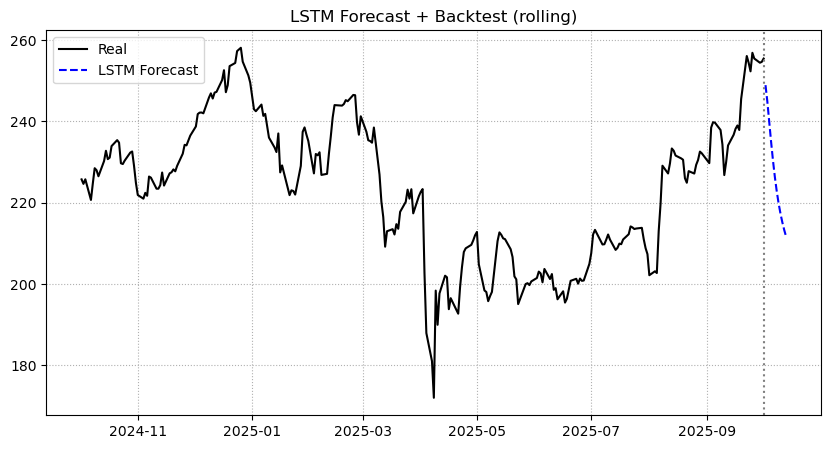

(         Date    Forecast
 0  2025-10-02  248.914032
 1  2025-10-03  244.776917
 2  2025-10-04  239.817551
 3  2025-10-05  234.876404
 4  2025-10-06  230.316406
 5  2025-10-07  226.282227
 6  2025-10-08  222.782730
 7  2025-10-09  219.805267
 8  2025-10-10  217.283295
 9  2025-10-11  215.130051
 10 2025-10-12  213.256546
 11 2025-10-13  211.627899,
 'C:\\Users\\40738043122\\forecast_lstm_results.xlsx')

In [16]:
ts.forecast_lstm(
    close_prices, 
    backtest=True, 
    method="rolling", 
    test_size=24, 
    train_size=120 
)

11:43:35 - cmdstanpy - INFO - Chain [1] start processing
11:43:35 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


Length of data 364 Day -> initial=328 days, horizon=36 days
Prophet cross-validation start...

Prophet Cross-Validation metrics:
  horizon       rmse        mae      mape  coverage
0  2 days   9.331535   9.016786  0.038900       0.5
1  3 days  12.532244  12.486754  0.053745       0.0
2  7 days  17.373085  17.023114  0.073796       0.0
3  8 days  26.581369  26.003781  0.110681       0.0
4  9 days  33.798848  33.726419  0.141017       0.0


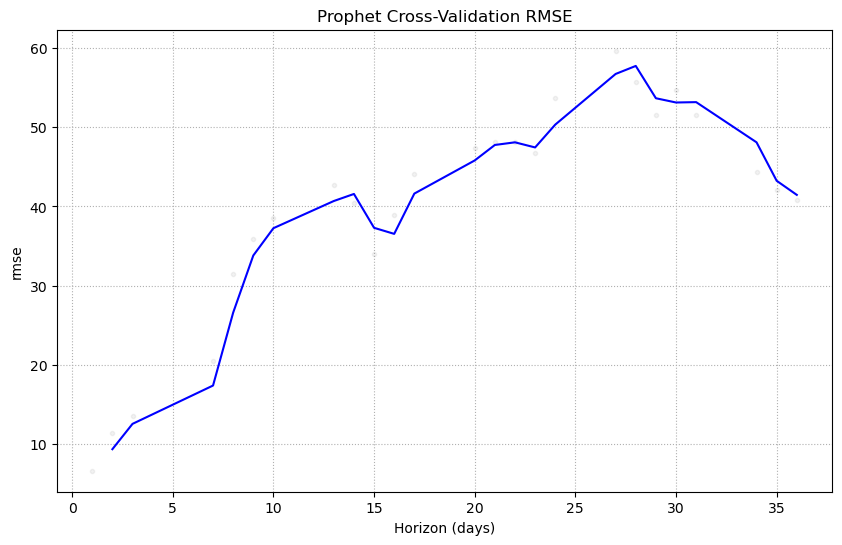

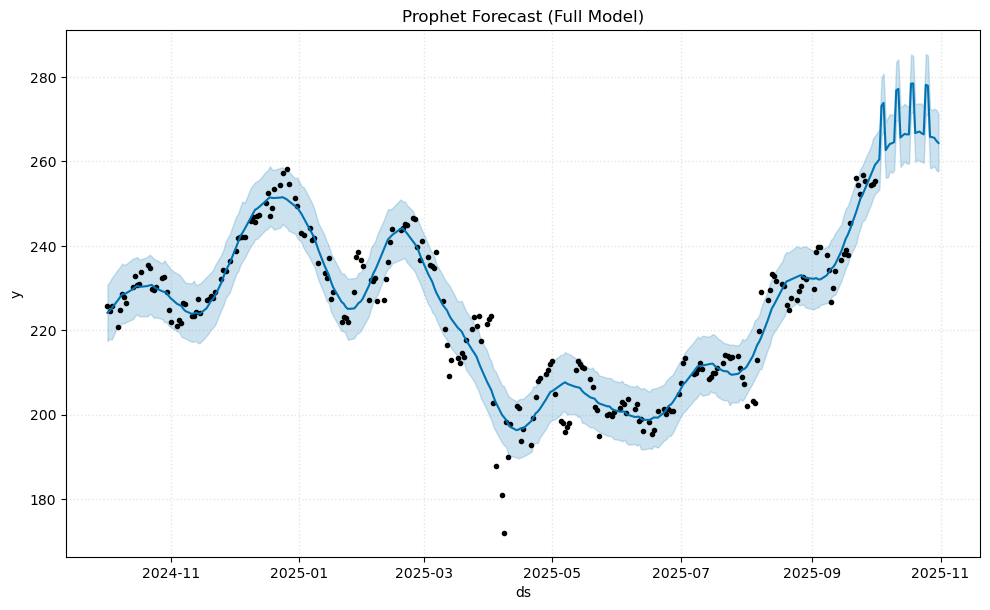

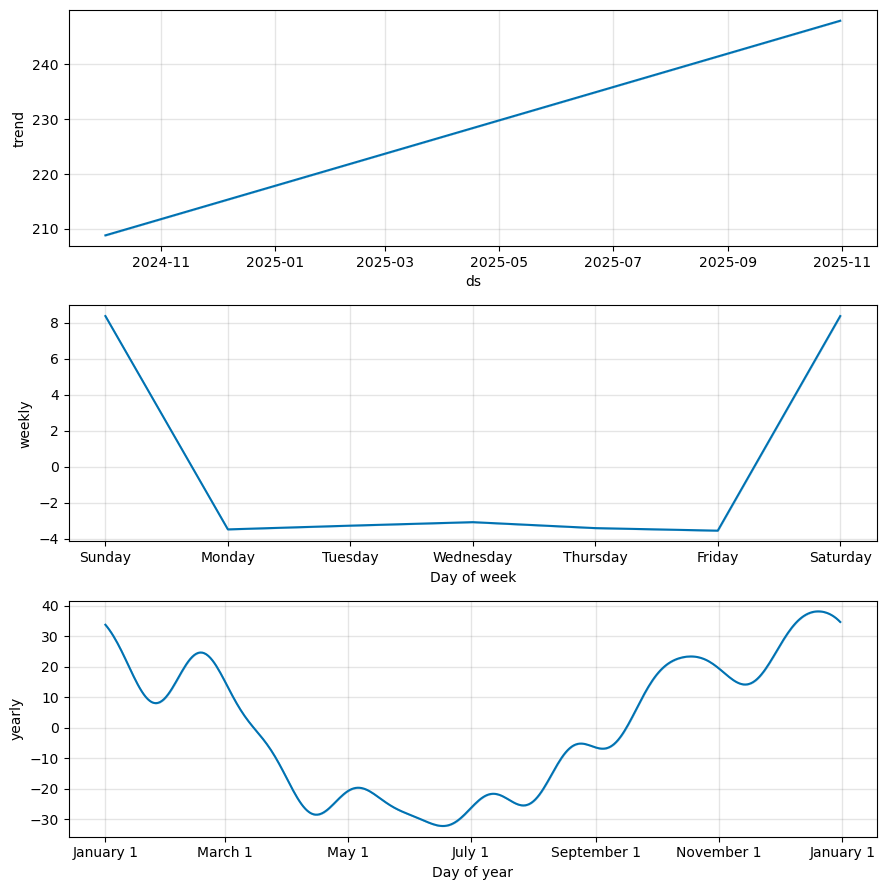

Prophet Results saved.


In [17]:
m, forecast, df_cv, df_p = ts.prophet_forecast(
    close_prices)

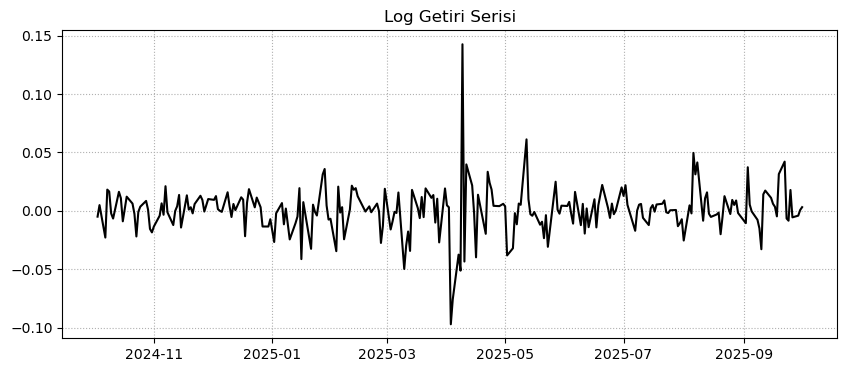

In [18]:
log_returns = ts.prepare_returns(close_prices)


                      Constant Mean - ARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                645.721
Distribution:                  Normal   AIC:                          -1285.44
Method:            Maximum Likelihood   BIC:                          -1274.89
                                        No. Observations:                  249
Date:                Thu, Oct 23 2025   Df Residuals:                      248
Time:                        11:44:28   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.5692e-04  1.154e-03      0.309      0.757 

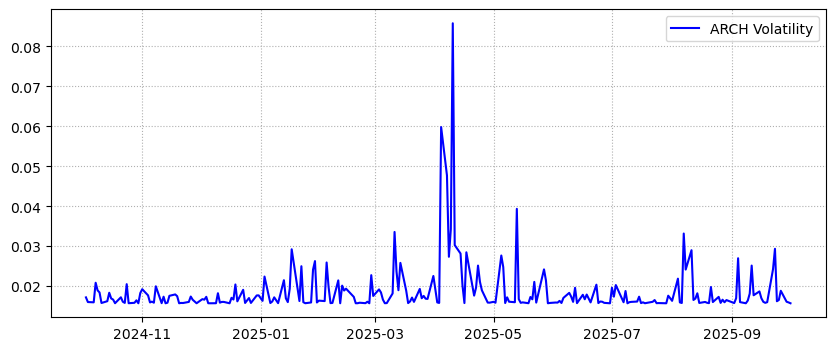

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                651.778
Distribution:                  Normal   AIC:                          -1295.56
Method:            Maximum Likelihood   BIC:                          -1281.49
                                        No. Observations:                  249
Date:                Thu, Oct 23 2025   Df Residuals:                      248
Time:                        11:44:28   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.2187e-03  1.155e-03      1.056      0.291 

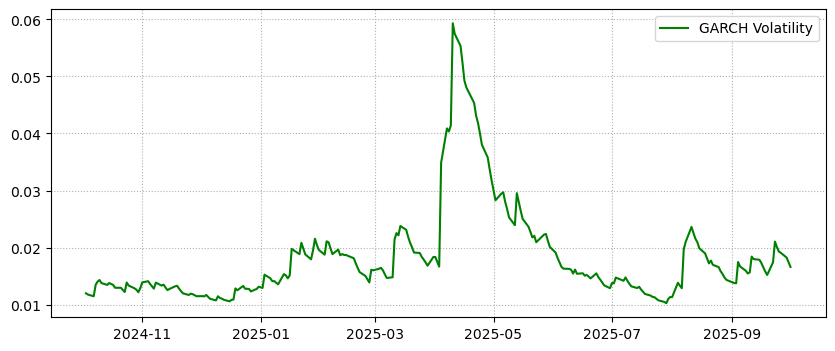

                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                652.911
Distribution:                  Normal   AIC:                          -1297.82
Method:            Maximum Likelihood   BIC:                          -1283.75
                                        No. Observations:                  249
Date:                Thu, Oct 23 2025   Df Residuals:                      248
Time:                        11:44:28   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0476e-03  3.393e-04      3.087  2.020e-03 [3.

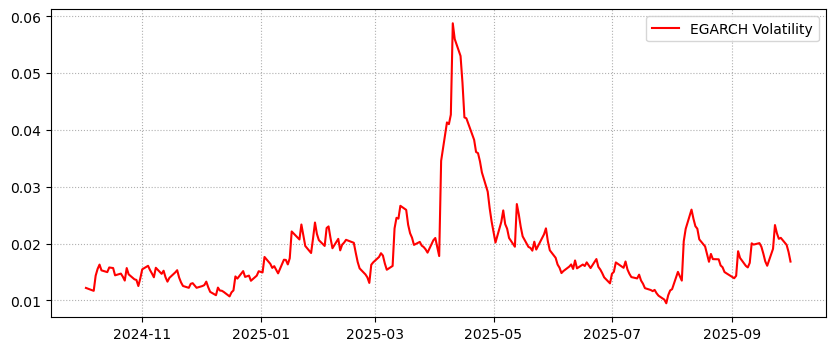

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                661.257
Distribution:                  Normal   AIC:                          -1312.51
Method:            Maximum Likelihood   BIC:                          -1294.93
                                        No. Observations:                  249
Date:                Thu, Oct 23 2025   Df Residuals:                      248
Time:                        11:44:28   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0953e-03  1.605e-04      6.824  8.872e-12 [7.

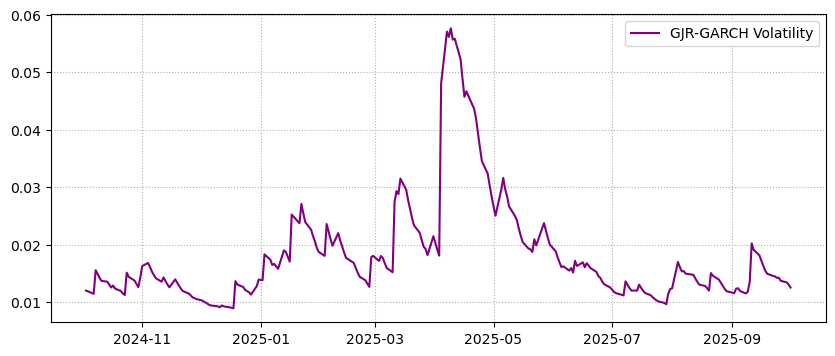

In [19]:


arch_res = ts.fit_arch(log_returns)
garch_res = ts.fit_garch(log_returns)
egarch_res = ts.fit_egarch(log_returns)
gjr_res = ts.fit_gjr_garch(log_returns)

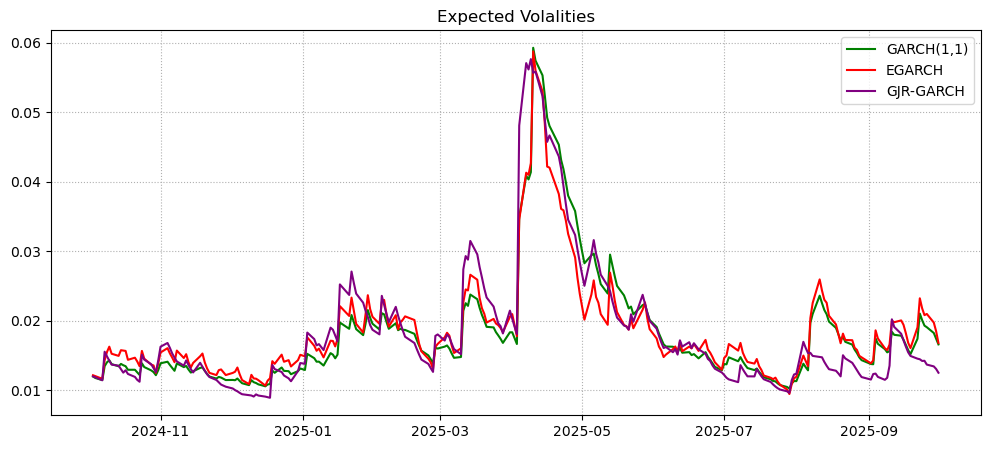

In [20]:
plt.figure(figsize=(12,5))
plt.plot(garch_res.conditional_volatility, label="GARCH(1,1)", color="green")
plt.plot(egarch_res.conditional_volatility, label="EGARCH", color="red")
plt.plot(gjr_res.conditional_volatility, label="GJR-GARCH", color="purple")
plt.legend()
plt.title("Expected Volalities")
plt.grid(True, linestyle=":")
plt.show()

[Index frequency could not be detected automatically, ‘B’ (business day) is assumed.


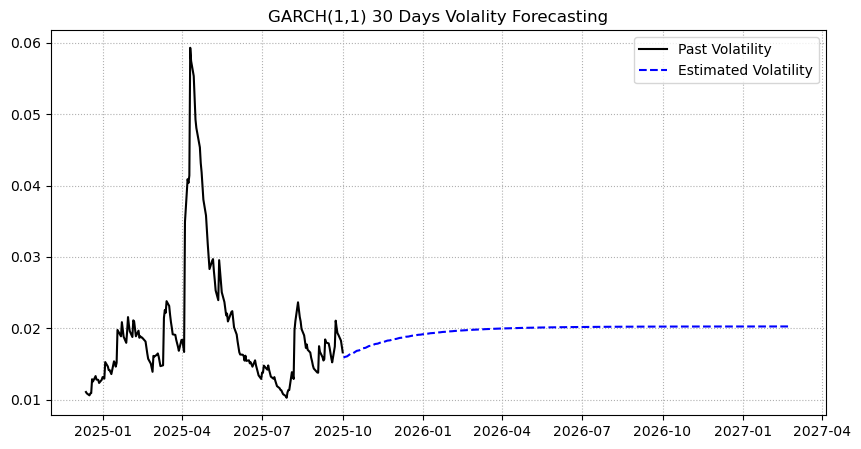

 Volatility forecasts for the next 365 period have been recorded. → volatility_forecast.xlsx
            Estimated Volatility
2025-10-02              0.015859
2025-10-03              0.015959
2025-10-06              0.016056
2025-10-07              0.016151
2025-10-08              0.016243
...                          ...
2027-02-18              0.020246
2027-02-19              0.020246
2027-02-22              0.020246
2027-02-23              0.020247
2027-02-24              0.020247

[365 rows x 1 columns]


In [21]:
forecast_vol = ts.forecast_garch_volatility(
    garch_res,
    log_returns,   # ← ekledik
    steps=365,
    title="GARCH(1,1) 30 Days Volality Forecasting"
)


                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                652.911
Distribution:                  Normal   AIC:                          -1297.82
Method:            Maximum Likelihood   BIC:                          -1283.75
                                        No. Observations:                  249
Date:                Thu, Oct 23 2025   Df Residuals:                      248
Time:                        11:44:39   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0476e-03  3.393e-04      3.087  2.020e-03 [3.

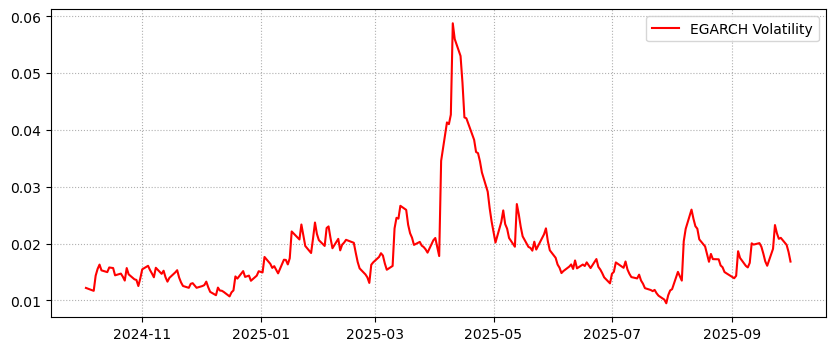

Analytical estimation is not supported; switching to simulation method...
[Index frequency could not be detected automatically, ‘B’ (business day) is assumed.


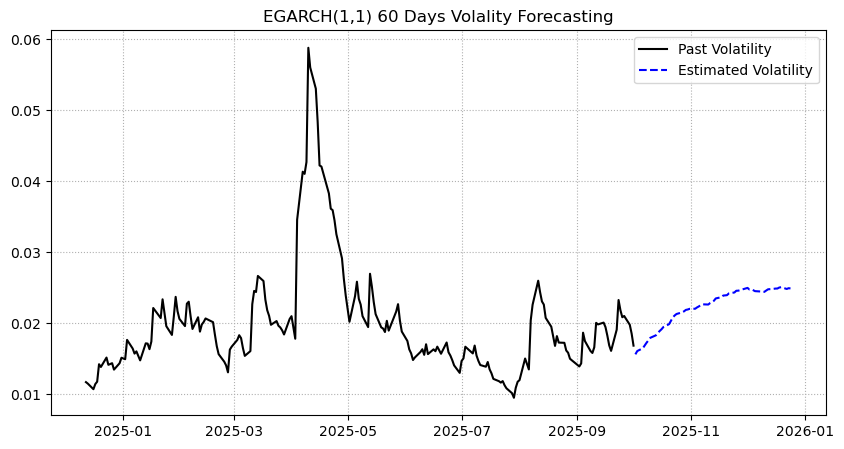

 Volatility forecasts for the next 60 period have been recorded. → volatility_forecast.xlsx
            Estimated Volatility
2025-10-02              0.015596
2025-10-03              0.016057
2025-10-06              0.016457
2025-10-07              0.016850
2025-10-08              0.017238
2025-10-09              0.017575
2025-10-10              0.017926
2025-10-13              0.018280
2025-10-14              0.018600
2025-10-15              0.018883
2025-10-16              0.019133
2025-10-17              0.019444
2025-10-20              0.019843
2025-10-21              0.020300
2025-10-22              0.020796
2025-10-23              0.021063
2025-10-24              0.021278
2025-10-27              0.021511
2025-10-28              0.021648
2025-10-29              0.021855
2025-10-30              0.021912
2025-10-31              0.022004
2025-11-03              0.022020
2025-11-04              0.022208
2025-11-05              0.022352
2025-11-06              0.022545
2025-11-07       

In [22]:
egarch_res = ts.fit_egarch(log_returns)
forecast_egarch = ts.forecast_garch_volatility(egarch_res, log_returns, steps=60, 
                                            title="EGARCH(1,1) 60 Days Volality Forecasting")

Stationary = green, Non-Stationary = red:


,Model,p,q,AIC,α+β,Status
15,EGARCH,3,1,-1298.743330,1.124613,Non-Stationary
9,EGARCH,1,1,-1297.821427,1.228483,Non-Stationary
1,GARCH,1,2,-1297.012256,0.417362,Stationary
16,EGARCH,3,2,-1296.743330,1.124582,Non-Stationary
10,EGARCH,1,2,-1296.470634,0.963140,Stationary
11,EGARCH,1,3,-1296.153835,0.638537,Stationary
12,EGARCH,2,1,-1296.113331,1.281903,Non-Stationary
2,GARCH,1,3,-1295.570303,0.388566,Stationary
0,GARCH,1,1,-1295.555188,0.980000,Stationary
3,GARCH,2,1,-1295.501931,0.962908,Stationary



✅ Best Model: GARCH(1,2) | AIC=-1297.012 | α+β=0.417


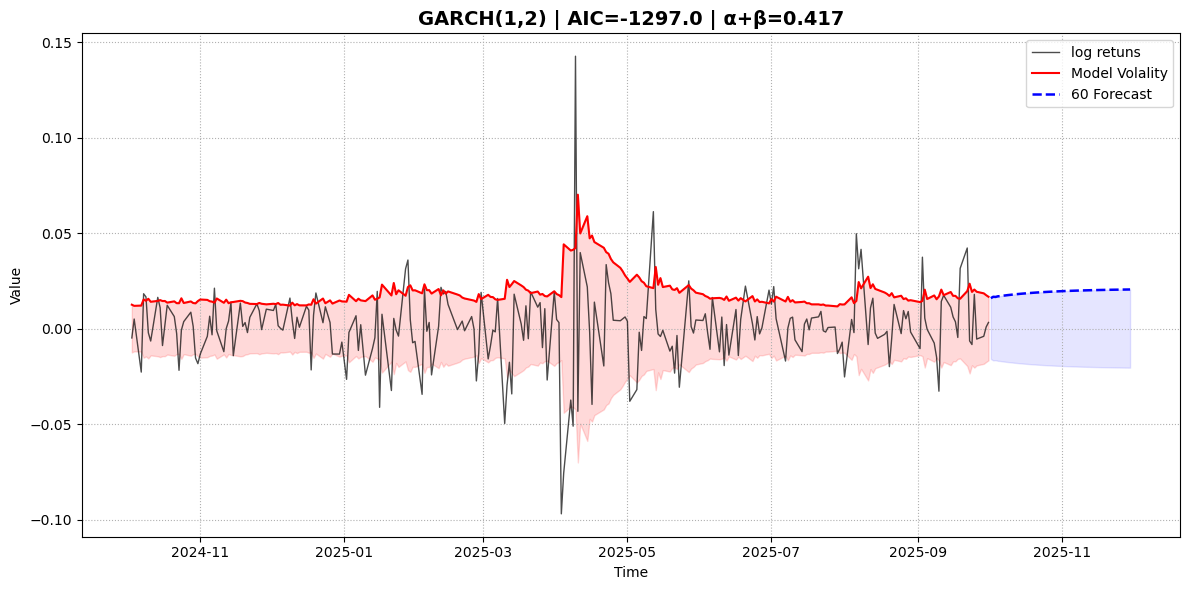

In [23]:
best_model, best_info = ts.fit_best_vol_model(
    log_returns,
    p_range=(1, 3),
    q_range=(1, 3),
    threshold=1,  
)